In [351]:
import numpy as np
import pandas as pd
import torch
import seaborn as sns
from matplotlib import pyplot as plt
import torch.nn as nn  # Import the PyTorch neural network module
import torch.optim as optim

### Reading the Dataset

In [352]:
df = pd.read_csv("data.csv")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### checking the features in the dataset

In [353]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### checking the missing values

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [355]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Filling the missing values in dataset

In [356]:
df['Gender'] = df.Gender.fillna(df.Gender.mode()[0])
df['Married'] = df.Married.fillna(df.Married.mode()[0])
df['Dependents'] = df.Dependents.fillna(df.Dependents.mode()[0])
df['Self_Employed'] = df.Self_Employed.fillna(df.Self_Employed.mode()[0])
df['LoanAmount'] = df.LoanAmount.fillna(df.LoanAmount.mean())
df['Loan_Amount_Term'] = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())
df['Credit_History'] = df.Credit_History.fillna(df.Credit_History.mean())

In [357]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\Awais Nayyar\AppData\Local\Temp\ipykernel_8076\4003964133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


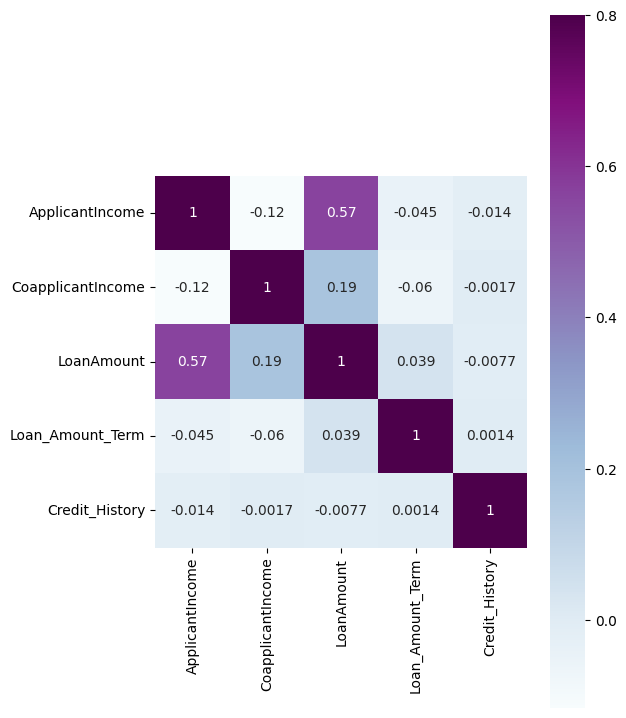

In [358]:
matrix = df.corr()
plt.figure(figsize=(6,9))
sns.heatmap(data=matrix, vmax=.8, square=True, cmap='BuPu', annot=True)
plt.show()

### splitting the dataset to Train and Test data

In [359]:
X = df.drop('Loan_Status', axis=1)

In [360]:
y = df['Loan_Status']

In [361]:
from sklearn.model_selection import train_test_split

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

### Encoding Ordinal Categorical variables

In [363]:
cat_train_ordinal = X_train.loc[:, ['Education', 'Self_Employed', 'Property_Area']]
cat_test_ordinal = X_test.loc[:, ['Education', 'Self_Employed', 'Property_Area']]

In [364]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [365]:
oe = OrdinalEncoder(categories=[['Not Graduate', 'Graduate'], ['No', 'Yes'], ['Urban', 'Semiurban', 'Rural']], dtype=np.int8)

In [366]:
arr_cat_train_ordinal = oe.fit_transform(cat_train_ordinal)
arr_cat_test_ordinal = oe.transform(cat_test_ordinal) #we only transform the test data 

### Encoding Nominal categorical variables

In [367]:
cat_train_nominal = X_train.loc[:, ['Gender', 'Married', 'Dependents']]
cat_test_nominal = X_test.loc[:, ['Gender', 'Married', 'Dependents']]

In [368]:
oh = OneHotEncoder(drop='first', sparse=False, dtype=np.int32)
arr_cat_train_nominal = oh.fit_transform(cat_train_nominal)
arr_cat_test_nominal = oh.transform(cat_test_nominal)


C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [369]:
encoded_column_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df_encoded_train_ordinal = pd.DataFrame(arr_cat_train_ordinal, columns=['Education', 'Self_Employed', 'Property_Area'])
df_encoded_test_ordinal = pd.DataFrame(arr_cat_test_ordinal, columns=['Education', 'Self_Employed', 'Property_Area'])

df_encoded_train_nominal = pd.DataFrame(arr_cat_train_nominal, columns=['Gender', 'Married', 'Dependents_1', 'Dependents_2', 'Dependents_3+'])
df_encoded_test_nominal = pd.DataFrame(arr_cat_test_nominal, columns=['Gender', 'Married', 'Dependents_1', 'Dependents_2', 'Dependents_3+'])

X_encoded_train = np.hstack([df_encoded_train_nominal, df_encoded_train_ordinal])
X_encoded_test = np.hstack([df_encoded_test_nominal, df_encoded_test_ordinal])
# df_encoded_train = pd.concat([df_encoded_train_nominal, df_encoded_train_ordinal], axis=1)
# df_encoded_test = pd.concat([df_encoded_test_nominal, df_encoded_test_ordinal], axis=1)

In [370]:
X_train_without_cat = X_train.drop(encoded_column_names, axis=1) # removing categorical columns from Dataframe
X_test_without_cat = X_test.drop(encoded_column_names, axis=1) # removing categorical columns from Dataframe

In [371]:
X_train_arr = np.hstack([X_train_without_cat, X_encoded_train])
X_test_arr= np.hstack([X_test_without_cat, X_encoded_test])

In [372]:
X_train_df = pd.DataFrame(X_train_arr, columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History', 'Gender', 'Married', 'Dependents_1','Dependents_2','Dependents_3+', 'Education', 'Self_Employed', 'Property_Area'])
X_test_df = pd.DataFrame(X_test_arr, columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History', 'Gender', 'Married', 'Dependents_1','Dependents_2','Dependents_3+', 'Education', 'Self_Employed', 'Property_Area'])

### Encoding target variables

In [373]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### Feature Selection

In [374]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [375]:
selector = SelectKBest(score_func=chi2, k=8)  # Select top 8 features
X_train_new = selector.fit_transform(X_train_df, y_train)
X_test_new = selector.transform(X_test_df)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_train_features = X_train_df.columns[selected_indices]
selected_test_features = X_test_df.columns[selected_indices]

#Print the selected feature names
print(selected_train_features)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married', 'Dependents_2',
       'Dependents_3+'],
      dtype='object')


In [376]:
df_selected_train_features = X_train_df.loc[:, selected_train_features]
df_selected_test_features = X_test_df.loc[:, selected_test_features]

In [381]:
#converting to pytorch tensors
X_train_tensor = torch.tensor(df_selected_train_features.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape y_train to match the model output
X_test_tensor = torch.tensor(df_selected_test_features.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  # Reshape y_test to match the model output


### Simple neural network

In [382]:
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return x

# Define your model
input_size = X_train_tensor.shape[1]
simple_model = SimpleNN(input_size)

# Define loss and optimizer
loss_fn = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.SGD(simple_model.parameters(), lr=0.01)

# Training loop
for epoch in range(10):
    optimizer.zero_grad()
    preds = simple_model(X_train_tensor)
    loss = loss_fn(preds, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluation
simple_model.eval()
with torch.no_grad():
    predictions = (simple_model(X_test_tensor) >= 0.5).float()  # Apply a threshold of 0.5 for binary classification
    accuracy = (predictions == y_test_tensor).float().mean()
    print(f"Simple Model Accuracy: {accuracy.item()}")
#     print(y_test_tensor)

Simple Model Accuracy: 0.7154471278190613


### Neural Network with 2 hidden layers

In [384]:
class TwoHiddenLayerNN(nn.Module):
    def __init__(self, input_size):
        super(TwoHiddenLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)  # First hidden layer with 32 neurons
        self.fc2 = nn.Linear(32, 16)  # Second hidden layer with 16 neurons
        self.fc3 = nn.Linear(16, 1)  # Output layer with 1 neuron

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # we can also try other activation functions like Tanh or Sigmoid
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Define your model
input_size = X_train_tensor.shape[1]
two_hidden_model = TwoHiddenLayerNN(input_size)

# Define loss and optimizer
loss_fn = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(two_hidden_model.parameters(), lr=0.001)  # Using Adam optimizer

# Training loop
for epoch in range(10):
    optimizer.zero_grad()
    preds = two_hidden_model(X_train_tensor)
    loss = loss_fn(preds, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluation
two_hidden_model.eval()
with torch.no_grad():
    predictions = (two_hidden_model(X_test_tensor) >= 0.5).float()  # Apply a threshold of 0.5 for binary classification
    accuracy = (predictions == y_test_tensor).float().mean()
    print(f"Two Hidden Layer Model Accuracy: {accuracy.item()}")


Two Hidden Layer Model Accuracy: 0.7154471278190613
